In [1]:
import seaborn as sns
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stimuli1 = 'horizontal'
stimuli2 = 'vertical'

layer = 'L4'

In [3]:
#############################
# Visual Analysis

l4_horizonal_input = f'{stimuli1}/{layer}_{stimuli1}.csv'
l4_vertical_input = f'{stimuli2}/{layer}_{stimuli2}.csv'

l4_horizontal = pd.read_csv(l4_horizonal_input).sort_values('timestamps')
l4_vertical = pd.read_csv(l4_vertical_input).sort_values('timestamps')

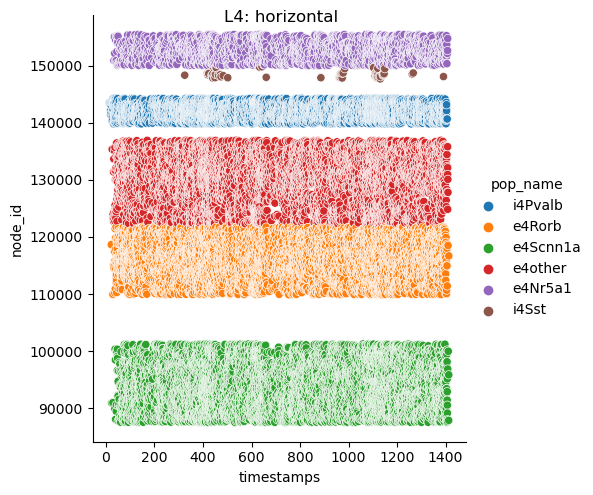

In [4]:
#########################################
# Visualize firing w population grouping

# hue_order = l4_horizontal['pop_name'].unique().tolist()

rel = sns.relplot(data=l4_horizontal, x='timestamps', y='node_id', hue='pop_name')
rel.fig.suptitle(f'{layer}: {stimuli1}')
plt.show()

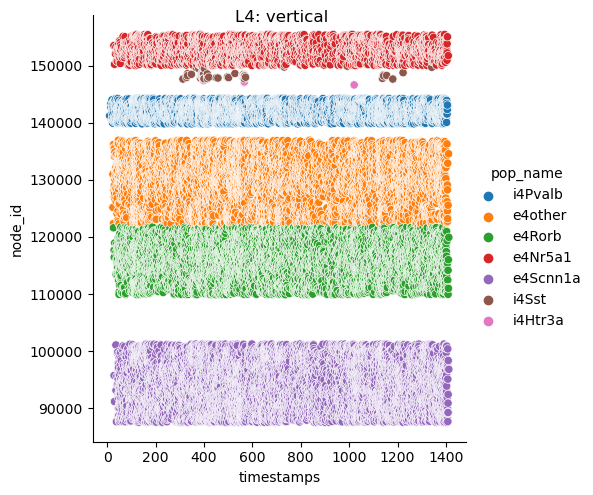

In [5]:
rel = sns.relplot(data=l4_vertical, x='timestamps', y='node_id', hue='pop_name')
rel.fig.suptitle(f'{layer}: {stimuli2}')
plt.show()

In [6]:
#########################################
# Account for population type differences

l4_horizontal_populations = l4_horizontal['pop_name'].unique().tolist()
l4_vertical_populations = l4_vertical['pop_name'].unique().tolist()

difference = list(set(l4_horizontal_populations) - set(l4_vertical_populations))
difference2 = list(set(l4_vertical_populations) - set(l4_horizontal_populations))

if difference:
    for pop in difference:
        l4_horizontal = l4_horizontal[l4_horizontal.pop_name != pop]
        l4_vertical = l4_vertical[l4_vertical.pop_name != pop]
if difference2:
    for pop in difference2:
        l4_horizontal = l4_horizontal[l4_horizontal.pop_name != pop]
        l4_vertical = l4_vertical[l4_vertical.pop_name != pop]


In [7]:
############################################
# Normalize between common min max timesteps

mins = [l4_horizontal['timestamps'].min(), l4_vertical['timestamps'].min()]
maxs = [l4_horizontal['timestamps'].max(), l4_vertical['timestamps'].max()]

analysis_min = max(mins)
analysis_max = min(maxs)

In [8]:
print(mins)
print(maxs)

[15.25, 9.5]
[1413.0, 1412.25]


In [9]:
#########################
# Change timestamp bounds

l4_horizontal = l4_horizontal.loc[(l4_horizontal['timestamps'] >= analysis_min) & (l4_horizontal['timestamps'] <= analysis_max)]
l4_vertical = l4_vertical.loc[(l4_vertical['timestamps'] >= analysis_min) & (l4_vertical['timestamps'] <= analysis_max)]

l4_horizontal.iloc[-1, l4_horizontal.columns.get_loc('timestamps')] = analysis_max
l4_horizontal.iloc[0, l4_horizontal.columns.get_loc('timestamps')] = analysis_min

l4_vertical.iloc[-1, l4_vertical.columns.get_loc('timestamps')] = analysis_max
l4_vertical.iloc[0, l4_vertical.columns.get_loc('timestamps')] = analysis_min

In [10]:
####################
# Convert into bins

l4_horizontal['timestamp bins'] = pd.cut(l4_horizontal['timestamps'], bins=100).astype(str)
l4_vertical['timestamp bins'] = pd.cut(l4_vertical['timestamps'], bins=100).astype(str)

In [11]:
hue_order = l4_horizontal['pop_name'].unique().tolist()

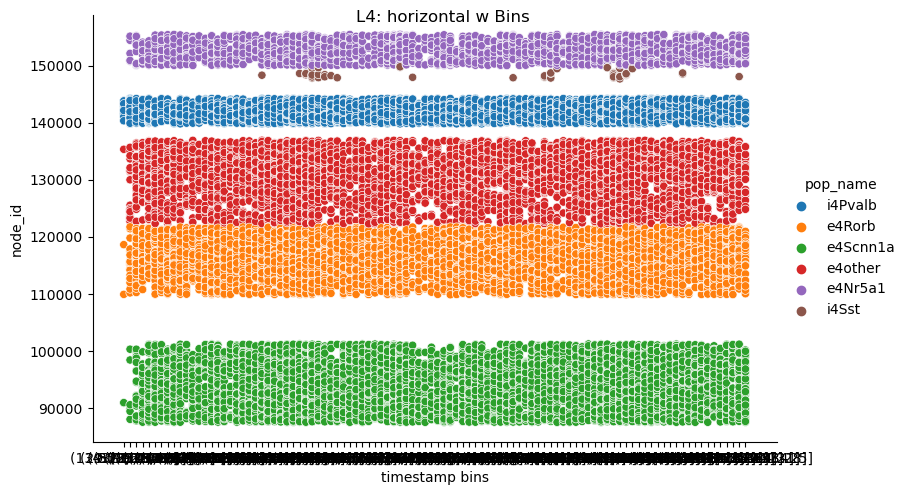

In [12]:
rel = sns.relplot(data=l4_horizontal, x='timestamp bins', y='node_id', hue='pop_name', hue_order=hue_order, aspect=1.61)
rel.fig.suptitle(f'{layer}: {stimuli1} w Bins')
plt.show()

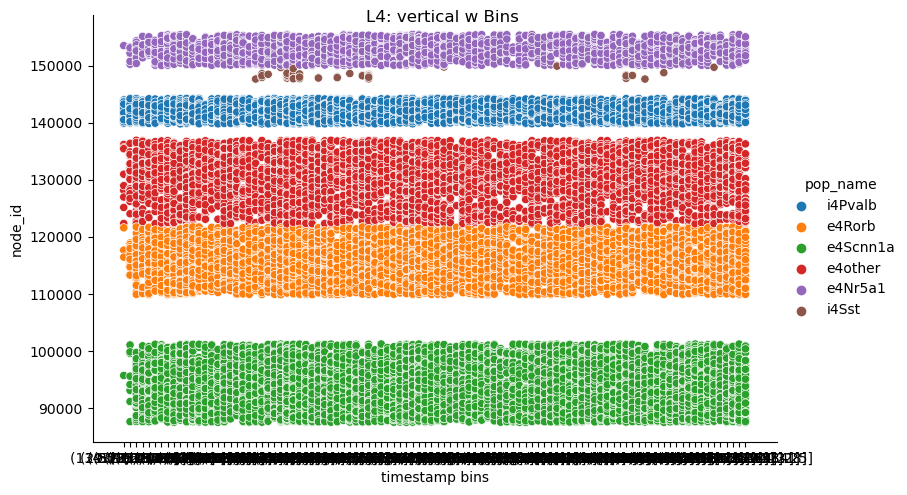

In [13]:
rel = sns.relplot(data=l4_vertical, x='timestamp bins', y='node_id', hue='pop_name', hue_order=hue_order, aspect=1.61)
rel.fig.suptitle(f'{layer}: {stimuli2} w Bins')
plt.show()

In [14]:
#####################
# The statistics


In [15]:
timestamps = l4_vertical['timestamp bins'].unique().tolist()
pop_names = l4_horizontal['pop_name'].unique().tolist()

In [16]:
pop_names

['i4Pvalb', 'e4Rorb', 'e4Scnn1a', 'e4other', 'e4Nr5a1', 'i4Sst']

In [17]:
column_names = pop_names.copy()
column_names[:0] = ['timestamp bins']

statistical_horizontal = pd.DataFrame(columns=column_names)
statistical_vertical = pd.DataFrame(columns=column_names)

In [18]:
for timestamp in timestamps:

    line_horizontal = [timestamp]
    line_vertical = [timestamp]

    l4_horizontal_bin = l4_horizontal.loc[l4_horizontal['timestamp bins'] == timestamp]
    l4_vertical_bin = l4_vertical.loc[l4_vertical['timestamp bins'] == timestamp]

    for population in pop_names:
        horizontal_counts = len(l4_horizontal_bin[l4_horizontal_bin.pop_name == population])
        vertical_counts = len(l4_vertical_bin[l4_vertical_bin.pop_name == population])
        
        line_horizontal.append(horizontal_counts)
        line_vertical.append(vertical_counts)

    statistical_horizontal.loc[len(statistical_horizontal)] = line_horizontal
    statistical_vertical.loc[len(statistical_vertical)] = line_vertical

In [19]:
statistical_horizontal['Total Firing'] = statistical_horizontal.iloc[:, 1:].sum(axis=1)
statistical_vertical['Total Firing'] = statistical_vertical.iloc[:, 1:].sum(axis=1)

In [20]:
statistical_horizontal

,timestamp bins,i4Pvalb,e4Rorb,e4Scnn1a,e4other,e4Nr5a1,i4Sst,Total Firing
0,"(13.853, 29.22]",18,2,2,1,0,0,23.0
1,"(29.22, 43.19]",53,19,6,24,7,0,109.0
2,"(43.19, 57.16]",23,44,18,38,14,0,137.0
3,"(57.16, 71.13]",42,56,30,50,15,0,193.0
4,"(71.13, 85.1]",49,55,67,57,16,0,244.0
...,...,...,...,...,...,...,...,...
95,"(1342.4, 1356.37]",37,56,54,38,22,0,207.0
96,"(1356.37, 1370.34]",50,66,81,60,16,0,273.0
97,"(1370.34, 1384.31]",51,50,86,61,23,0,271.0
98,"(1384.31, 1398.28]",49,48,75,51,22,1,246.0


In [21]:
hue_order

['i4Pvalb', 'e4Rorb', 'e4Scnn1a', 'e4other', 'e4Nr5a1', 'i4Sst']

In [22]:
# statistical_horizontal.iloc[:, 1:]

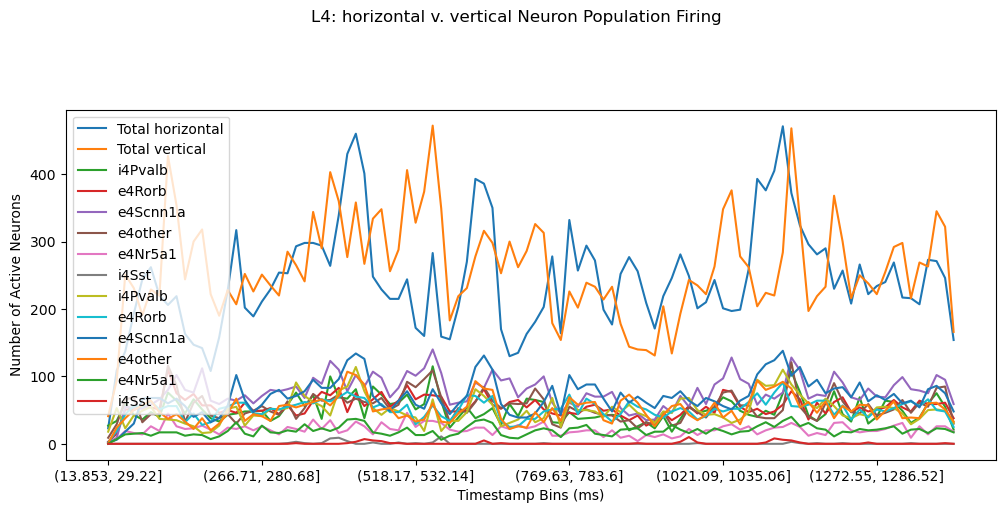

In [24]:
##################################
# Plot population firing over time

fig = plt.figure(figsize=(12,10))
fig.tight_layout(pad=5.0)
st = fig.suptitle(f"{layer}: {stimuli1} v. {stimuli2} Neuron Population Firing")
ax1 = fig.add_subplot(211)

ax1.plot(statistical_horizontal['Total Firing'], label=f'Total {stimuli1}')
ax1.plot(statistical_vertical['Total Firing'], label=f'Total {stimuli2}')

ax1.plot(statistical_vertical['i4Pvalb'], label='i4Pvalb')
ax1.plot(statistical_vertical['e4Rorb'], label='e4Rorb')
ax1.plot(statistical_vertical['e4Scnn1a'], label='e4Scnn1a')
ax1.plot(statistical_vertical['e4other'], label='e4other')
ax1.plot(statistical_vertical['e4Nr5a1'], label='e4Nr5a1')
ax1.plot(statistical_vertical['i4Sst'], label='i4Sst')

ax1.plot(statistical_horizontal['i4Pvalb'], label='i4Pvalb')
ax1.plot(statistical_horizontal['e4Rorb'], label='e4Rorb')
ax1.plot(statistical_horizontal['e4Scnn1a'], label='e4Scnn1a')
ax1.plot(statistical_horizontal['e4other'], label='e4other')
ax1.plot(statistical_horizontal['e4Nr5a1'], label='e4Nr5a1')
ax1.plot(statistical_horizontal['i4Sst'], label='i4Sst')

ax1.set_xticks(range(0, statistical_horizontal.shape[0], 18))
ax1.set_xticklabels(statistical_horizontal['timestamp bins'].loc[::18])
ax1.set_xlabel('Timestamp Bins (ms)')
ax1.set_ylabel('Number of Active Neurons')

ax1.legend(loc='best')


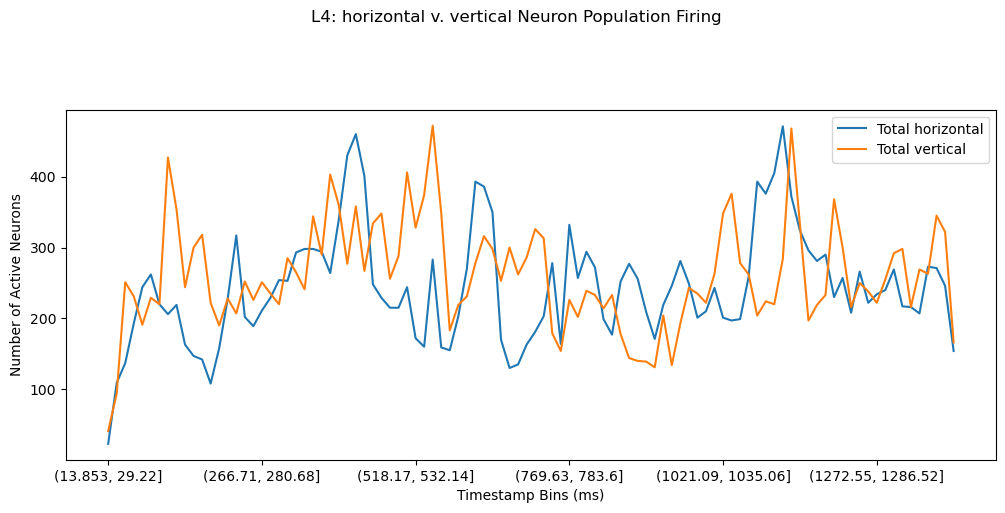

In [25]:
#################################
# Plotting only the total firing

fig = plt.figure(figsize=(12,10))
fig.tight_layout(pad=5.0)
st = fig.suptitle(f"{layer}: {stimuli1} v. {stimuli2} Neuron Population Firing")
ax1 = fig.add_subplot(211)

ax1.plot(statistical_horizontal['Total Firing'], label=f'Total {stimuli1}')
ax1.plot(statistical_vertical['Total Firing'], label=f'Total {stimuli2}')

ax1.set_xticks(range(0, statistical_horizontal.shape[0], 18))
ax1.set_xticklabels(statistical_horizontal['timestamp bins'].loc[::18])
ax1.set_xlabel('Timestamp Bins (ms)')
ax1.set_ylabel('Number of Active Neurons')

ax1.legend(loc='best')

# ax.plot(x,y)
# loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
# ax.xaxis.set_major_locator(loc)
# plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(statistical_horizontal['Total Firing'], statistical_vertical['Total Firing']))

In [27]:
rmse

96.67176423340996

In [28]:
###########################
# Add Error to results file

analysis_results = pd.read_csv('analysis_results.csv')

column_name = layer + ' RMSE'

analysis_results.loc[(analysis_results['stimuli1'] == stimuli1) & (analysis_results['stimuli2'] == stimuli2), column_name] = rmse

analysis_results.to_csv('analysis_results.csv', index=False)

In [29]:
analysis_results

,stimuli1,stimuli2,L1 RMSE,L23 RMSE,L4 RMSE,L5 RMSE,L6 RMSE
0,horizontal,vertical,23.138064,150.678908,96.671764,96.098172,151.120616
1,horizontal,diagonal-l2r,21.894520,130.671554,92.627642,93.956443,143.854300
2,horizontal,diagonal-r2l,21.364690,109.220114,93.972443,88.247354,142.649794
3,vertical,diagonal-l2r,23.161174,143.870554,103.659105,101.239063,158.681097
4,vertical,diagonal-r2l,25.469393,165.827018,104.404023,113.904626,167.268848
5,diagonal-l2r,diagonal-r2l,23.248226,124.345161,93.868845,103.077907,148.267789
